# Investigating Expanded Parameter Space

675 files for parameters:

- beam sizes (& 1/2 width PD)
	- [0.8,1,1.2] mm

- long. off (common)
	- [-1,-.5,0,.5,1] mm
	
- lat. off
	- [-100,-50,0,50,100] um
	
- tilt (about RX waist)
	- +/- 150 urad (61 points)
	
- gaps (1/2)
	- [0,10,20] um

In [1]:
#  Automated import
import sys
import os
sys.path.append('..')

from hg_scripts.setup_imports import *

import csv



In [2]:
class csv_params:
    def __init__(self,file_no,lo_size,rx_size,long_off,lat_off,gaps):
        self.file_no = int(file_no)
        self.lo_size = float(lo_size)
        self.rx_size = float(rx_size)
        self.long_off = float(long_off)
        self.lat_off = float(lat_off)
        self.gaps = float(gaps)
        
    def show(self):
        print(self.file_no,self.lo_size,self.rx_size,self.long_off,self.lat_off,self.gaps)
        

In [3]:
#csv to array
csv_arr = []
with open("inputs/exp_param_space.csv") as csvfile:
    reader = csv.reader(csvfile) # change contents to floats
    for row in reader: # each row is a list
        csv_arr.append(row)
        
print('parameters to vary: ',csv_arr[1])

params_list = []
for i in csv_arr[1:]:
    params_list.append(csv_params(i[0],i[1],i[2],i[3],i[4],i[5]))

params_list[0].show()

parameters to vary:  ['1', '0.0008', '0.0008', '-0.001', '-0.0001', '0']
1 0.0008 0.0008 -0.001 -0.0001 0.0


In [4]:
#expansion orders
sh_order = 1
ti_order = 7

#terms in xp matrix
xpfile = dict_from_xpfile('x_p_file')
sols_matrix = xpfile[str(sh_order)+'_shift_'+str(ti_order)+'_tilt']
xpfile.clear()

In [5]:
# params=pl.Params(1064e-9,waist,0)
# K=params.getK()

i=0
v = Gen_Vars(params_list[i].file_no,
             params_list[i].lo_size,
             params_list[i].rx_size,
             params_list[i].long_off,
             params_list[i].lat_off,
             params_list[i].gaps)

print(params_list[i].file_no,
             params_list[i].lo_size,
             params_list[i].rx_size,
             params_list[i].long_off,
             params_list[i].lat_off,
             params_list[i].gaps)
# v = Gen_Vars(params_list[i].file_no,
#              1e-3,
#              1e-3,
#              -10e-3,
#              params_list[i].lat_off,
#              params_list[i].gaps)



1 0.0008 0.0008 -0.001 -0.0001 0.0


In [6]:
num = 61 #number points in tilt

print('Signals calculation...')

modes_0=plb.modes((0,0,1))

dws_arr = [0]*num
lps_arr = [0]*num
total_lps_arr = [0]*num

dws,lpsR,lpsT = signals(v,modes_0,sols_matrix)


Signals calculation...


3.125 s


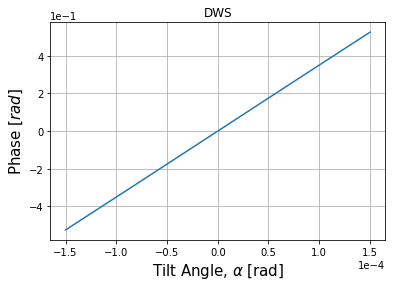

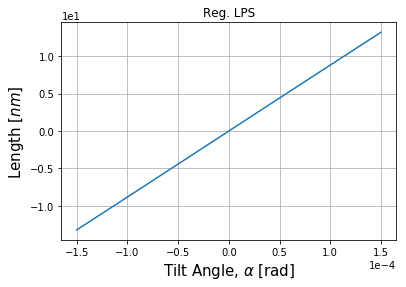

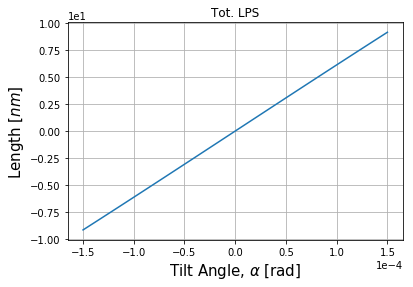

In [7]:
plot_dws(v.alpha_arr,dws)
plot_lpsR(v.alpha_arr,lpsR)
plot_lpsT(v.alpha_arr,lpsT)

In [8]:
master_dws=[]
master_lpsR=[]
master_lpsT=[]
master_dws_slope=[]
master_lpsR_slope=[]
master_lpsT_slope=[]

In [9]:
for i in params_list:
    v = Gen_Vars(i.file_no,
             i.lo_size,
             i.rx_size,
             i.long_off,
             i.lat_off,
             i.gaps)
    
    dws,lpsR,lpsT = signals(v,modes_0,sols_matrix)
    
    dws_slope = np.zeros(len(dws),np.float)
    dws_slope[0:-1] = np.diff(dws)/np.diff(v.alpha_arr)
    dws_slope[-1] = (dws[-1] - dws[-2])/(v.alpha_arr[-1] - v.alpha_arr[-2])
    lpsR_slope = np.zeros(len(lpsR),np.float)
    lpsR_slope[0:-1] = np.diff(lpsR)/np.diff(v.alpha_arr)
    lpsR_slope[-1] = (lpsR[-1] - lpsR[-2])/(v.alpha_arr[-1] - v.alpha_arr[-2])
    lpsT_slope = np.zeros(len(lpsT),np.float)
    lpsT_slope[0:-1] = np.diff(lpsT)/np.diff(v.alpha_arr)
    lpsT_slope[-1] = (lpsT[-1] - lpsT[-2])/(v.alpha_arr[-1] - v.alpha_arr[-2])



    desc = (f"LO size: {i.lo_size},RX size:{i.rx_size},long_off:{i.long_off},lat_off:{i.lat_off},gaps(1/2),{i.gaps}")

    note = str(i.file_no)

    scipy.io.savemat('Results_mats/param_space/'+note+'.mat', mdict={'desc': desc,'angle': v.alpha_arr, 'lpsR'+note: lpsR, 'lpsT'+note: lpsT,'dws'+note: dws,
                                             'lpsR_slope'+note: lpsR_slope, 'lpsT_slope'+note : lpsT_slope,
                                            'dws_slope'+note: dws_slope})
    
    master_dws.append(dws)
    master_lpsR.append(lpsR)
    master_lpsT.append(lpsT)
    master_dws_slope.append(dws_slope)
    master_lpsT_slope.append(lpsT_slope)
    master_lpsR_slope.append(lpsR_slope)


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.84375 s


100%|#########################################################################|


2.890625 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.875 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


3.515625 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


3.53125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


3.140625 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


3.15625 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


3.015625 s


100%|#########################################################################|


2.859375 s


100%|#########################################################################|


2.75 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


4.203125 s


100%|#########################################################################|


3.140625 s


100%|#########################################################################|


2.921875 s


100%|#########################################################################|


2.9375 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.890625 s


100%|#########################################################################|


3.125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.96875 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.859375 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.875 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


3.015625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


3.046875 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.921875 s


100%|#########################################################################|


3.078125 s


100%|#########################################################################|


3.015625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.890625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.375 s


100%|#########################################################################|


2.40625 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.96875 s


100%|#########################################################################|


3.203125 s


100%|#########################################################################|


2.75 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


3.28125 s


100%|#########################################################################|


2.859375 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.421875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.84375 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.921875 s


100%|#########################################################################|


3.265625 s


100%|#########################################################################|


2.875 s


100%|#########################################################################|


3.296875 s


100%|#########################################################################|


3.171875 s


100%|#########################################################################|


2.75 s


100%|#########################################################################|


2.921875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


3.078125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


3.0625 s


100%|#########################################################################|


3.546875 s


100%|#########################################################################|


3.1875 s


100%|#########################################################################|


3.03125 s


100%|#########################################################################|


2.90625 s


100%|#########################################################################|


3.359375 s


100%|#########################################################################|


2.921875 s


100%|#########################################################################|


3.046875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


3.234375 s


100%|#########################################################################|


2.859375 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


3.109375 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.78125 s


100%|#########################################################################|


3.09375 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


3.0625 s


100%|#########################################################################|


2.890625 s


100%|#########################################################################|


3.015625 s


100%|#########################################################################|


2.96875 s


100%|#########################################################################|


2.84375 s


100%|#########################################################################|


2.875 s


100%|#########################################################################|


2.953125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.875 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


3.15625 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


3.15625 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.984375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.828125 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.984375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.59375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.609375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.859375 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.546875 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.4375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.515625 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.53125 s


100%|#########################################################################|


2.5 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.46875 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.484375 s


100%|#########################################################################|


2.453125 s


100%|#########################################################################|


2.578125 s


100%|#########################################################################|


3.015625 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.5625 s


100%|#########################################################################|


2.875 s


100%|#########################################################################|


3.171875 s


100%|#########################################################################|


2.921875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.640625 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.75 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.75 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.796875 s


100%|#########################################################################|


2.75 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.625 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.8125 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.6875 s


100%|#########################################################################|


2.65625 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.734375 s


100%|#########################################################################|


2.765625 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.671875 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.703125 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


100%|#########################################################################|


2.71875 s


2.75 s


In [10]:
desc = ("Master mat file for expanded param space.")

note = "master"

scipy.io.savemat('Results_mats/param_space/'+note+'.mat', mdict={'desc': desc,'angle': v.alpha_arr, 'lpsR': master_lpsR, 'lpsT': master_lpsT,'dws': master_dws,
                                         'lpsR_slope': master_lpsR_slope, 'lpsT_slope' : master_lpsT_slope,
                                        'master_dws_slope': master_dws_slope})